In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, random

In [2]:
def load_data(path):
    loaded_data = pd.read_csv(path)
    return loaded_data

In [12]:
train_data = load_data('IA2-train.csv')
val_data = load_data('IA2-dev.csv')

In [13]:
val_data.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,0,23,1,1,0,26218,258,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,40,1,0,1,35835,267,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,30,1,0,1,34740,189,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,25,1,1,0,2630,178,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,39,1,0,1,56883,18,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
data.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,24,1,0,1,2630,187,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,44,1,0,1,56865,150,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,32,1,0,1,50126,188,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,56,1,0,1,45578,89,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,32,1,0,1,2630,227,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data["dummy"].value_counts()

1    6000
Name: dummy, dtype: int64

In [66]:
def preprocess_data(data, normalize:bool=False, test:bool=False):
    # Your code here:
    preprocessed_data = data.copy()  

    # normalize data if option to normalize selected
    if normalize:
        global params
        params = {}
        for col in preprocessed_data.columns:
            if col == "Age" or col== "Annual_Premium" or col == "Vintage":
                μ = np.mean(preprocessed_data[col])
                σ = np.std(preprocessed_data[col])
                preprocessed_data[col]   = (preprocessed_data[col] -μ)/ σ
                params[col] = (μ, σ)
    if test:
         for col in preprocessed_data.columns:
            if col == "Age" or col== "Annual_Premium" or col == "Vintage":
                μ = params[col][0]
                σ = params[col][1]
                preprocessed_data[col]   = (preprocessed_data[col] -μ)/ σ
    
    # return preprocessed data   
    return preprocessed_data

In [291]:
processed_data = preprocess_data(train_data, normalize=True)
processed_val = preprocess_data(val_data, test=True)

In [309]:
processed_val.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,0,-1.242674,1,1,0,-0.259824,1.231055,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,-0.040303,1,0,1,0.288738,1.338667,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,-0.747580,1,0,1,0.226278,0.406034,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,-1.101218,1,1,0,-1.605302,0.274509,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,-0.111031,1,0,1,1.489333,-1.638584,0,0,...,0,0,0,0,0,0,0,0,0,1


In [185]:
processed_data.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,-1.171946,1,0,1,-1.605302,0.382120,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0.242608,1,0,1,1.488306,-0.060282,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,-0.606125,1,0,1,1.103908,0.394077,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1.091340,1,0,1,0.844486,-0.789649,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,-0.606125,1,0,1,-1.605302,0.860394,0,0,...,0,0,0,0,0,0,0,0,0,1


In [607]:
def LR_L2_train(train_data, val_data, λ, α, ϵ ,n_iter=4000):
    x_train = np.transpose(train_data.drop("Response", axis=1).to_numpy())   
    n_train = train_data.shape[0]
    n_features = train_data.shape[1] - 1
    y_train = train_data["Response"].to_numpy()
    
    x_val = np.transpose(val_data.drop("Response", axis=1).to_numpy())
    y_val = val_data["Response"].to_numpy()
    n_val = val_data.shape[0]
      
    w = np.ones(n_features) 
    convergence =np.zeros(n_iter + 1)
       
    for j in range(n_iter): 
        loss_train = 0
        loss_val = 0
        Bₙ_train = np.zeros(n_features)
      
        con_train = 0 
         
        ##Training Set 
        for i in range(n_train):
            yᵢ_train = y_train[i]
            prob_train = 1 / (1 + np.exp(-1 * np.dot(w, x_train[:, i])))
            if prob_train>= 0.5:
                ŷᵢ_train = 1
            else:
                ŷᵢ_train = 0 
                
            rem_train = yᵢ_train - prob_train
            Bₙ_train  += np.dot(rem_train, x_train[:, i])
            
            if yᵢ_train==ŷᵢ_train:
                loss_train += 1
            con_train += -yᵢ_train * np.log(prob_train) - (1 - yᵢ_train) * np.log(1 - prob_train)
            
        convergence[j + 1] = con_train / n_train + λ * np.sum(np.square(w[1 : ]))
        diff = convergence[j + 1] - convergence[j]
        train_acc = loss_train / n_train
        
        if abs(diff)>ϵ:
            w += (α / n_train) * Bₙ_train
            for k in range(1, n_features - 1):
                w[k] -= α * λ * w[k]
        else:
            break
    
    for i in range(n_val):
        yᵢ_val = y_val[i]
        prob_val = 1 / (1 + np.exp(-1 * np.dot(w, x_val[:, i])))
        if prob_val>= 0.5:
            ŷᵢ_val = 1
        else:
            ŷᵢ_val = 0 
        if yᵢ_val==ŷᵢ_val:
            loss_val += 1
            
    val_acc = loss_val / n_val

    return w, train_acc, val_acc, j

In [608]:
 weights, train_acc, val_acc, n_iter = LR_L2_train(processed_data, processed_val, 10**-2, 10**-1, 10**-4)

In [610]:
n_iter

1789

In [588]:
val_acc

0.7881

In [589]:
train_acc

0.7901666666666667

In [609]:
def LR_L1_train(train_data, val_data, λ, α, ϵ ,n_iter=4000):
    x_train = np.transpose(train_data.drop("Response", axis=1).to_numpy())   
    n_train = train_data.shape[0]
    n_features = train_data.shape[1] - 1
    y_train = train_data["Response"].to_numpy()
    
    x_val = np.transpose(val_data.drop("Response", axis=1).to_numpy())
    y_val = val_data["Response"].to_numpy()
    n_val = val_data.shape[0]
    
    w = np.ones(n_features) 
    convergence =np.zeros(n_iter + 1)
       
    for j in range(n_iter): 
        loss_train = 0
        loss_val = 0
        Bₙ_train = np.zeros(n_features)
      
        con_train = 0 
        
        ##Training Set 
        for i in range(n_train):
            yᵢ_train = y_train[i]
            prob_train = 1 / (1 + np.exp(-1 * np.dot(w, x_train[:, i])))
            if prob_train>= 0.5:
                ŷᵢ_train = 1
            else:
                ŷᵢ_train = 0 
                
            rem_train = yᵢ_train - prob_train
            Bₙ_train  += np.dot(rem_train, x_train[:, i])
            
            if yᵢ_train==ŷᵢ_train:
                loss_train += 1
            con_train += -yᵢ_train * np.log(prob_train) - (1 - yᵢ_train) * np.log(1 - prob_train)
            
        convergence[j + 1] = con_train / n_train + λ * np.sum(np.abs(w[1 : ]))
        diff = convergence[j + 1] - convergence[j]
        train_acc = loss_train / n_train
        
        if abs(diff)>ϵ:
            w += (α / n_train) * Bₙ_train
            for k in range(1, n_features - 1):
                w[k] = np.sign(w[k]) * (np.max([np.abs(w[k]) - α * λ, 0])) 
        else:
            break
    
    for i in range(n_val):
        yᵢ_val = y_val[i]
        prob_val = 1 / (1 + np.exp(-1 * np.dot(w, x_val[:, i])))
        if prob_val>= 0.5:
            ŷᵢ_val = 1
        else:
            ŷᵢ_val = 0 
        if yᵢ_val==ŷᵢ_val:
            loss_val += 1
            
    val_acc = loss_val / n_val

    return w, train_acc, val_acc, j

In [606]:
LR_L1_train(processed_data, processed_val, 10**-2, 10**-1, 10**-4)

(array([-1.16335206,  0.        , -0.00862729, -0.08418092, -1.7386283 ,
         1.72252628,  0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.10719095,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        -0.        ,  0.        ,  0.00316972, -0.        , -0.        ,
        -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        -0.        ,  0.18620265,  0.        , -0.        ,  0.        ,
        -0.        , -0.        ,  0.01857219,  0.02310817, -0.        ,
        -0.        ,  0.00610104,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        ,  0.        ,
        -0.        ,  0.        , -0.18201654,  0.        ,  0.        ,
         0.        ,  0.        ,  0.00243414, -0. 

In [670]:
ϵ = 10**-4

In [861]:
LR_L2_train(processed_data, processed_val, 10**2, 10**-2, ϵ)

(array([-0.03047249,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [862]:
i = [i for i in range(-4, 3, 1)]
λs = [10**i for i in i]
αs = [3, 3, 1, 1, 0.1, 0.01, 10**-2]
acc = [LR_L2_train(processed_data, processed_val, λs[k], αs[k], ϵ)[1:3] for (k,i) in enumerate(i)]

In [863]:
def plot_accuracy(acc, i, save, ridge=False, noise=False):
    fig, ax = plt.subplots(figsize=[16,9])
    plt.ylabel('Accuracy', fontweight="bold")
    plt.xlabel('i', fontweight="bold")

    if ridge:
        title_string = "Ridge"
    else:
        title_string = "Lasso"
    if noise:
         plt.title(f"Accuracy of model in respect to regularization parameter 10 ^ i, {title_string}; Noisy data", fontweight="bold")
    else:
        plt.title(f"Accuracy of model in respect to regularization parameter 10 ^ i, {title_string}", fontweight="bold")
        
    train_acc = [acc[i][0] for i in range(len(acc))]
    val_acc = [acc[i][1] for i in range(len(acc))]
    
    plt.plot(i, train_acc, label="Training")
    plt.plot(i, val_acc, label= "Validation")

    ax.legend(loc='upper right')
    plt.savefig(save)

    plt.show()

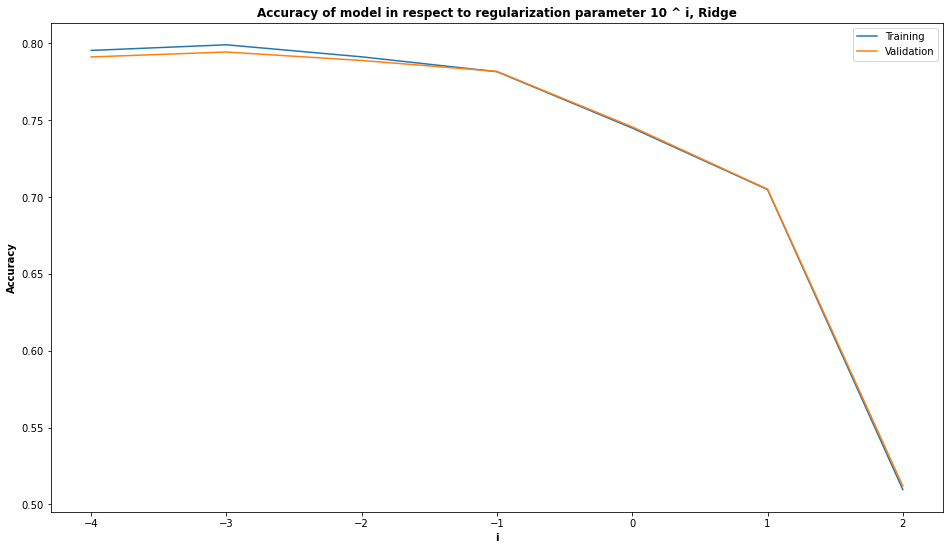

In [864]:
plot_accuracy(acc, i, "Accuracy Plot", True)

In [865]:
λs_opt = [10**-4 , 10**-3, 10**-2]
αs_opt = [3, 3, 1]
w_low, w_opt, w_high = [LR_L2_train(processed_data, processed_val, λ, αs_opt[k], ϵ)[0] for (k, λ) in enumerate(λs_opt)]

In [870]:
column = processed_data.drop(["Response", "dummy"], axis = 1).columns

In [884]:
pd.DataFrame(np.abs(w_low[1:]), column, columns=['Weights'] ).sort_values(by= "Weights", ascending=False).head()

,Weights
Previously_Insured,2.585663
Vehicle_Damage,2.115454
Driving_License,1.488991
Policy_Sales_Channel_26,1.291884
Region_Code_3,1.268665


In [885]:
pd.DataFrame(np.abs(w_opt[1:]), column, columns=['Weights'] ).sort_values(by= "Weights", ascending=False).head()

,Weights
Previously_Insured,2.583867
Vehicle_Damage,2.144211
Policy_Sales_Channel_160,1.054248
Region_Code_3,0.908677
Policy_Sales_Channel_163,0.809735


In [887]:
pd.DataFrame(np.abs(w_high[1:]), column, columns=['Weights'] ).sort_values(by= "Weights", ascending=False).head()

,Weights
Vehicle_Damage,1.595957
Previously_Insured,1.531072
Policy_Sales_Channel_163,0.838271
Policy_Sales_Channel_152,0.433331
Policy_Sales_Channel_160,0.417848


In [866]:
w1, w2, w3, w4, w5, w6, w7= [LR_L2_train(processed_data, processed_val, λ, αs[k], ϵ)[0] for (k, λ) in enumerate(λs)]

In [867]:
weights_check = [w1, w2, w3, w4, w5, w6, w7]

In [915]:
def plot_sparsity(weights, i, save):
    sparsity = np.zeros(len(i))
    for j in range(len(i)):
        sparsity[j] = np.sum(weights[j]<=10 ** -6)
    
    fig, ax = plt.subplots(figsize=[16,9])
    plt.ylabel('Sparsity', fontweight="bold")

    plt.xlabel('λ [10^i]', fontweight="bold")
    plt.title(f"Sparsity of weights in respect to λ [10 ^ i]", fontweight="bold")  
    plt.plot(i, sparsity)
   
    plt.savefig(save)

    plt.show()

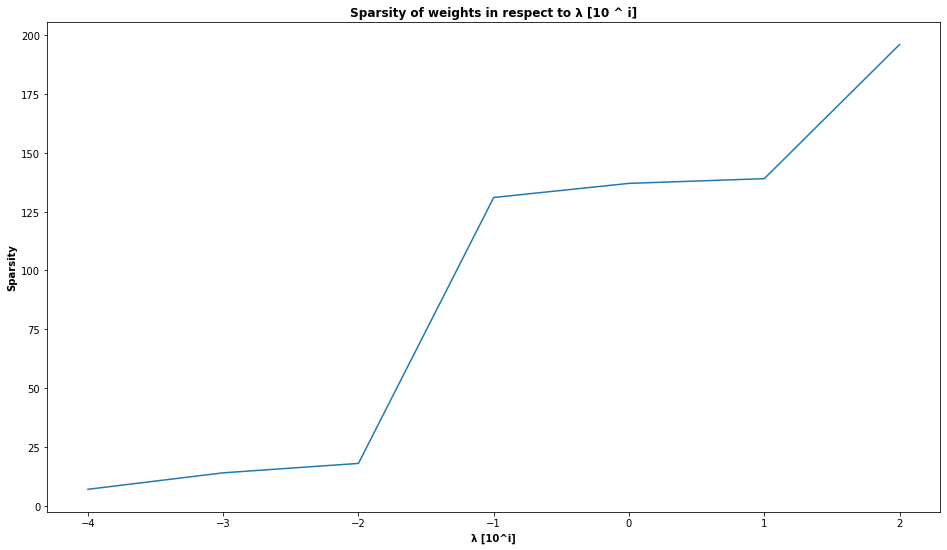

In [916]:
plot_sparsity(weights_check, i, "Sparsity plot")

In [781]:
noisy_data = load_data("IA2-train-noisy.csv")
noisy_data =preprocess_data(noisy_data, normalize=True)

In [782]:
noisy_data

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,-1.171946,1,0,1,-1.605302,0.382120,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0.242608,1,0,1,1.488306,-0.060282,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,-0.606125,1,0,1,1.103908,0.394077,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1.091340,1,0,1,0.844486,-0.789649,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,-0.606125,1,0,1,-1.605302,0.860394,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0.030425,1,0,0,0.229472,-0.705951,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,1,-0.393941,1,0,1,-0.291253,-1.220095,0,0,...,0,0,0,0,0,0,0,0,0,1
5997,1,0,-0.252486,1,0,1,-1.605302,0.334293,0,0,...,0,0,0,0,0,0,0,1,0,0
5998,1,0,-0.252486,1,0,1,-0.202327,-0.203764,0,0,...,0,0,0,0,0,0,0,0,0,0


In [875]:
i = [i for i in range(-4, 3, 1)]
λs = [10**i for i in i]
αs_noise = [2, 2, 2, 2, 10**-1, 10**-2, 10**-2]
acc_noisy = [LR_L2_train(noisy_data, processed_val, λs[k], αs_noise[k], ϵ)[1:3] for (k,i) in enumerate(i)]

In [874]:
 LR_L2_train(noisy_data, processed_val, 10**1, 10**-2, ϵ)[0]

array([-3.16609136e-002,  6.65538275e-004,  3.18168483e-003,
        2.09348721e-005, -4.47498703e-003,  4.59729833e-003,
        1.13203434e-003,  2.51883923e-005, -8.23487180e-006,
       -5.37095284e-006, -5.62161156e-005,  2.29985541e-004,
        1.50937800e-005,  3.02251269e-006, -7.13307310e-005,
       -1.22709377e-005, -5.74543146e-005, -5.72842433e-005,
       -1.25909811e-004, -3.98552130e-005,  3.17058835e-005,
        8.90396349e-006,  3.43507648e-005, -1.73852883e-004,
        2.59740790e-005,  4.15140653e-005, -2.23044930e-005,
        4.37853561e-005, -2.02372368e-005, -2.60140887e-005,
       -1.29401608e-005,  4.87948422e-005,  8.97403483e-006,
       -1.08461767e-004, -3.50081907e-005, -3.94603227e-005,
        1.36658069e-003, -1.59963161e-004, -3.09567306e-004,
        6.99233173e-005, -2.82234242e-005, -2.16962651e-005,
       -2.02571592e-005,  5.76282028e-005, -1.38922490e-004,
       -1.56190881e-004,  6.29445098e-005, -3.30268155e-005,
       -1.27101520e-005,

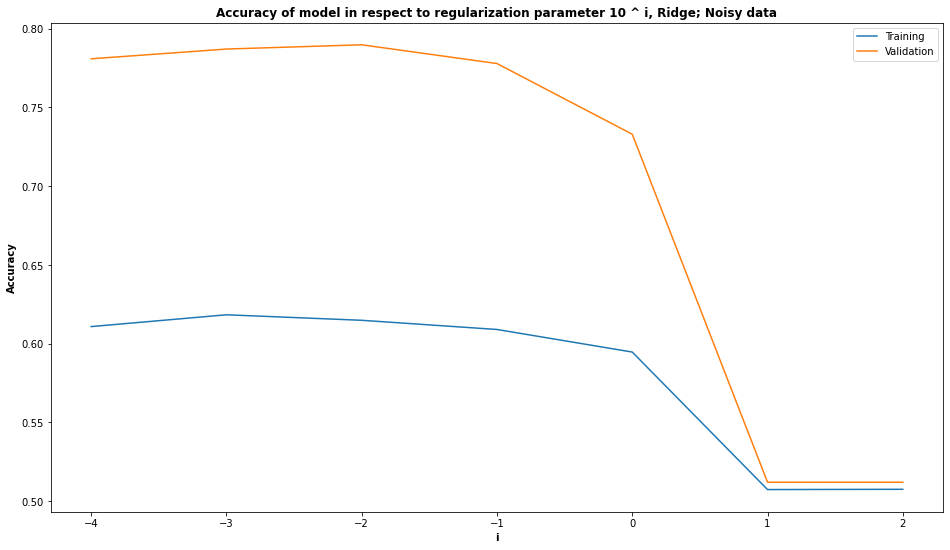

In [876]:
plot_accuracy(acc_noisy, i, "Noisy data", True, True)

In [909]:
i = [i for i in range(-4, 3, 1)]
λs = [10**i for i in i]
αs_L1 = [3, 3, 3, 3, 0.1, 0.01, 10**-5]
acc_L1 = [LR_L1_train(processed_data, processed_val, λs[k], αs_L1[k], ϵ)[1:3] for (k,i) in enumerate(i)]
L1_weights = [LR_L1_train(processed_data, processed_val, λ, αs_L1[k], ϵ)[0] for (k, λ) in enumerate(λs)]

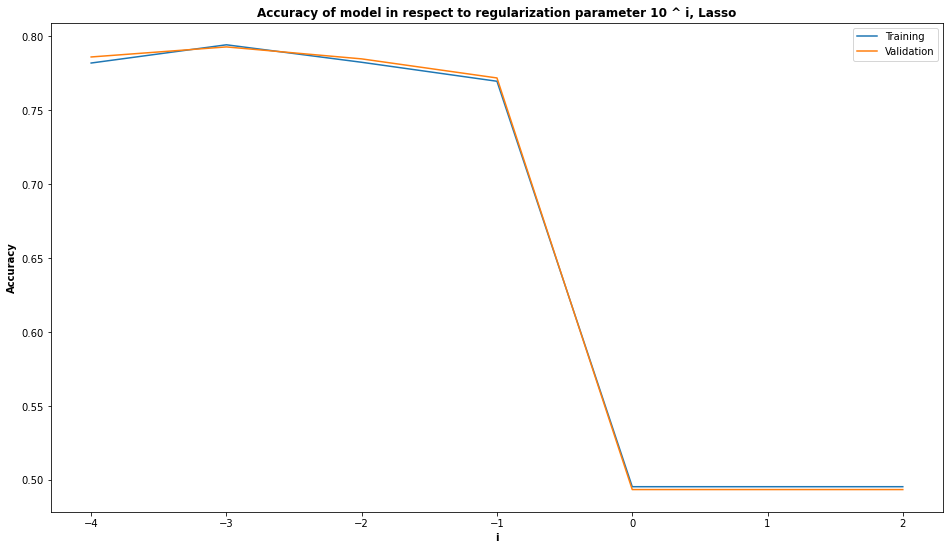

In [912]:
plot_accuracy(acc_L1, i, "L1_Accuracy Plot", False)

In [911]:
L1_weights = [LR_L1_train(processed_data, processed_val, λ, αs_L1[k], ϵ)[0] for (k, λ) in enumerate(λs)]

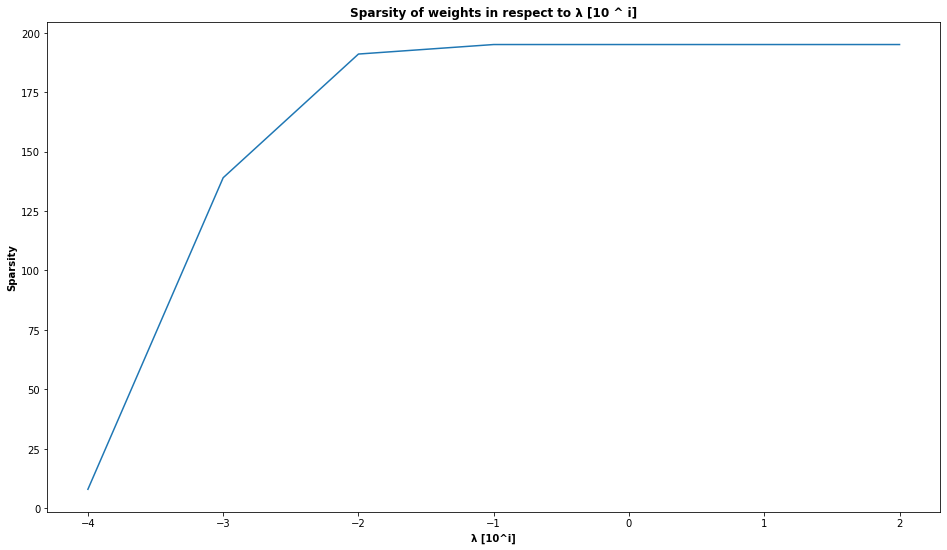

In [917]:
plot_sparsity(L1_weights, i, "L1_Sparsity plot")

In [923]:
L1_w1, L1_w2, L1_w3 = L1_weights[:3]

In [928]:
pd.DataFrame(np.abs(L1_w1[1:]), column, columns=['Weights'] ).sort_values(by= "Weights", ascending=False).head()

,Weights
Previously_Insured,2.086838
Vehicle_Damage,1.934265
Driving_License,1.299719
Policy_Sales_Channel_26,1.134430
Policy_Sales_Channel_157,1.112009


In [932]:
print(pd.DataFrame(np.abs(L1_w2[1:]), column, columns=['Weights'] ).sort_values(by= "Weights", ascending=False).head())

                           Weights
Previously_Insured        2.933444
Vehicle_Damage            2.208752
Policy_Sales_Channel_160  1.042485
Policy_Sales_Channel_163  0.797292
Region_Code_3             0.790680


In [933]:
pd.DataFrame(np.abs(L1_w3[1:]), column, columns=['Weights'] ).sort_values(by= "Weights", ascending=False).head()

,Weights
Previously_Insured,1.907822
Vehicle_Damage,1.889514
Policy_Sales_Channel_163,0.923033
Policy_Sales_Channel_26,0.225470
Policy_Sales_Channel_124,0.191655
